# Clustering

### Mean Shift Clustering

[4 6]
{'bandwidth': 0.1, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}
8


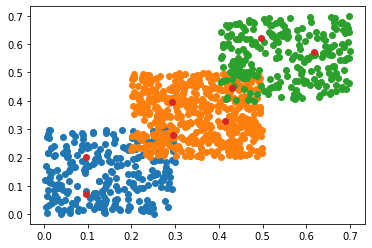

In [48]:
# Using Test Data
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.random.uniform(0, 0.3, size=(250, 2))

Y = np.random.uniform(0.2, 0.5, size=(500, 2))

Z = np.random.uniform(0.4, 0.7, size=(250, 2))

clustering = MeanShift(bandwidth=0.1).fit(np.concatenate((X, Y, Z)))

print(clustering.predict([[0, 0], [5, 5]]))

print(clustering.get_params())
print(len(clustering.cluster_centers_))

plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(Y[:, 0], Y[:, 1], 'o')
plt.plot(Z[:, 0], Z[:, 1], 'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()

{'bandwidth': 0.05, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': -1, 'seeds': None}
7


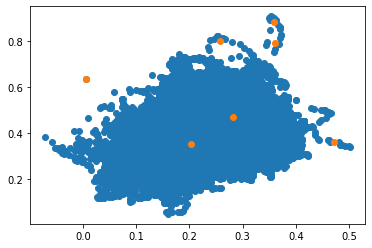

In [90]:
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)
clustering = MeanShift(bandwidth=0.01, n_jobs=-1).fit(both_hands)

print(clustering.get_params())
print(len(clustering.cluster_centers_))
plt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()

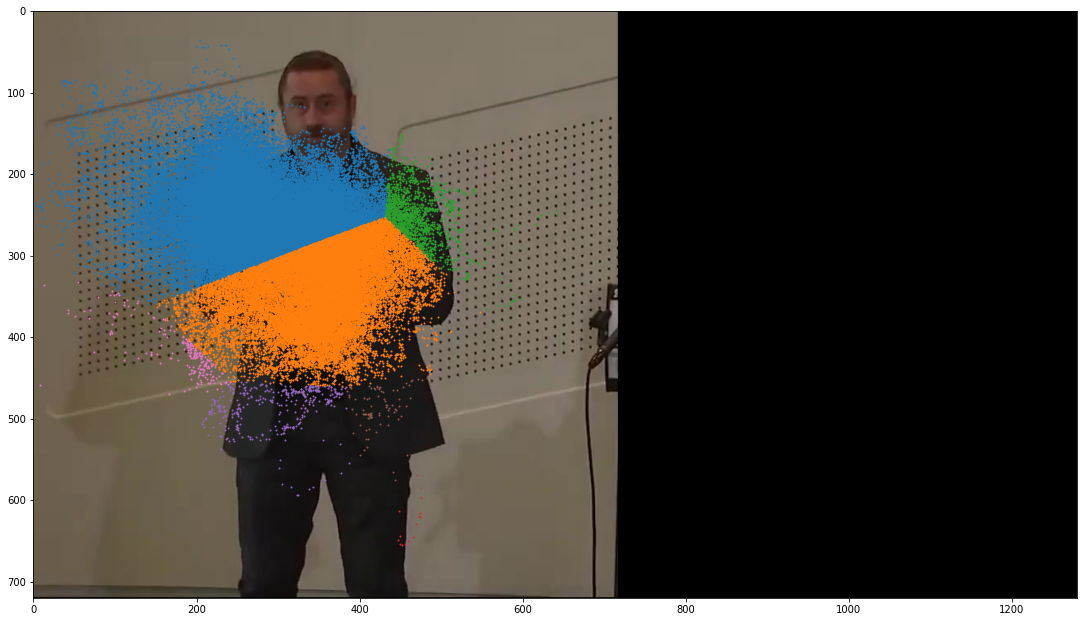

In [97]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = clustering.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
both_hands = np.array(left_hand + right_hand)
for center in range(0, len(clustering.cluster_centers_)):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1)
plt.imshow(background_image)
fig.savefig("./Clustered_MeanShifting.png", dpi=100)
plt.show()

### K-Means Clustering

[[0.1830638  0.24968858]
 [0.19266665 0.43390922]
 [0.25181137 0.55908445]
 [0.28682501 0.31863617]
 [0.13050112 0.34362803]
 [0.20698039 0.34818765]
 [0.29640304 0.39646137]
 [0.29387039 0.48293528]]


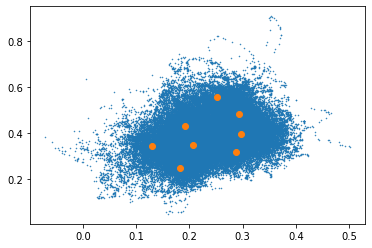

In [74]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)

kmeans = KMeans(n_clusters=8, random_state=0).fit(both_hands)

print(kmeans.cluster_centers_)
plt.plot(both_hands[:, 0], both_hands[:, 1] ,'o', markersize=0.5)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'o')
plt.show()

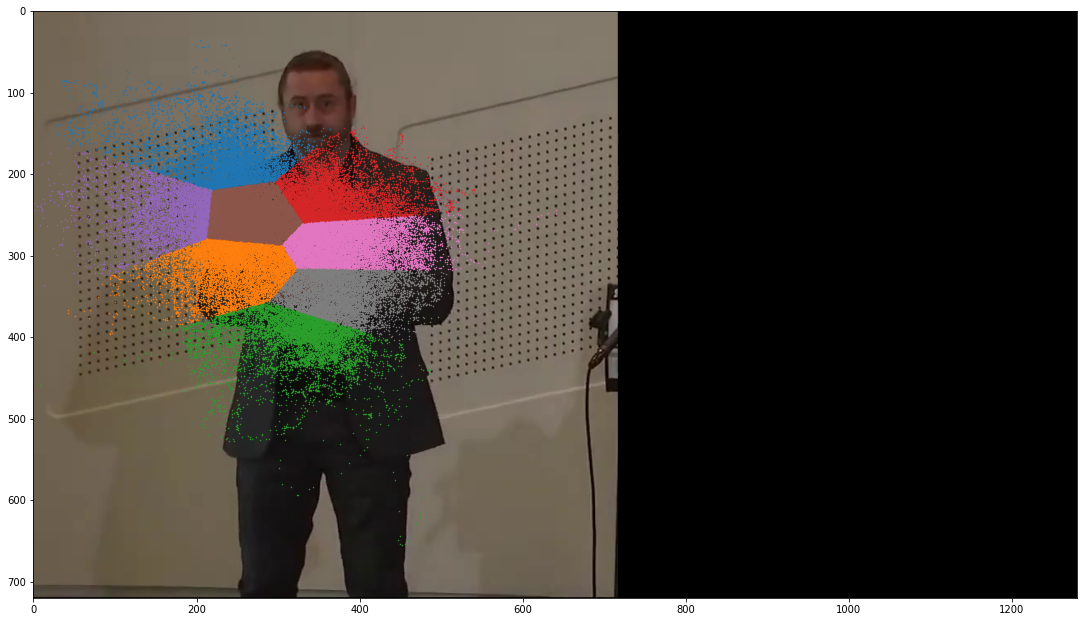

In [75]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = kmeans.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=0.5)
plt.imshow(background_image)
fig.savefig("./Clustered_K_means.png", dpi=100)
plt.show()

caRsLq4962c_Filtered.csv (8,)


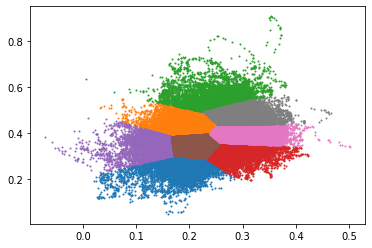

skF4Bo_Mdbk_Filtered.csv (8,)


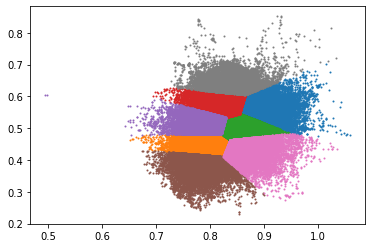

KLTCVuGNuqg_Filtered.csv (8,)


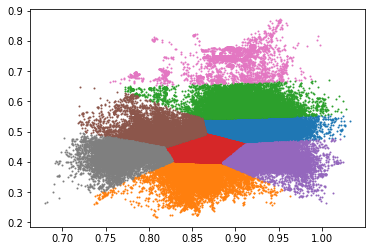

0sblzcxLTcI_Filtered.csv (8,)


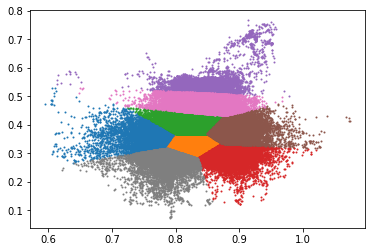

PEXbQEnjzo8_Filtered.csv (8,)


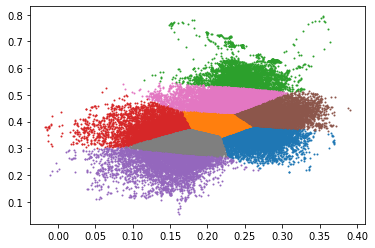

0sblzcxLTcI_Filtered_OLD.csv (8,)


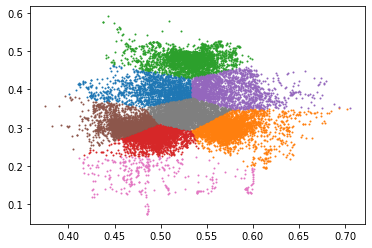

test.csv (8,)


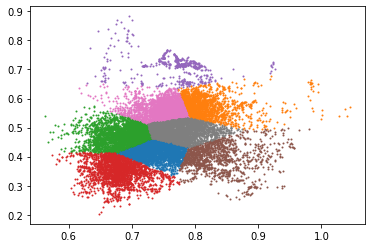

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"
alphas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for DATA_LOC in os.listdir(os.getcwd()):
    both_hands = []
    left_hand = []
    right_hand = []
    
    symbolized = {"Left":[], "Right":[]}
    symbols = {}
    if DATA_LOC.endswith(".csv"):
        data = pd.read_csv(DATA_LOC)
        left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
        both_hands += left_hand + right_hand


        both_hands = np.array(both_hands)

        kmeans = KMeans(n_clusters=8, random_state=0).fit(both_hands)

        #background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
        height, width, _ = 1, 1, 1
        predicts = kmeans.predict(both_hands)
        print(DATA_LOC, np.unique(predicts).shape)
        for center in np.unique(predicts):
            indices = np.where(predicts == center)
            plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
        #plt.imshow(background_image)
        #fig.savefig("./Clustered_BIRCH_more_points.png", dpi=100)
        plt.show()

### DBSCAN Clustering (MEMORY OVERFLOW!)

In [1]:
"""
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)
print(len(both_hands), len())

clustering = DBSCAN(eps=0.5, min_samples=5).fit(both_hands)

print(clustering.get_params())
print(len(clustering.cluster_centers_))
plt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()"""

'\nfrom sklearn.cluster import DBSCAN\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport random\nimport pandas as pd\nimport cv2\n\ndef convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):\n    data = []\n    for x, y, in zip(datax, datay):\n        data.append(tuple((x*width, y*height)))\n    return data\n\n# Read in data\nDATA_LOC = "./caRsLq4962c_Filtered.csv"\n\ndata = pd.read_csv(DATA_LOC)\n\nleft_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])\nright_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])\nboth_hands = np.array(left_hand + right_hand)\nprint(len(both_hands), len())\n\nclustering = DBSCAN(eps=0.5, min_samples=5).fit(both_hands)\n\nprint(clustering.get_params())\nprint(len(clustering.cluster_centers_))\nplt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,\'o\')\nplt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], \'o\')\nplt.show()'

### BIRCH Clustering

In [76]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)

brc = Birch(n_clusters=8, threshold=0.02)
brc.fit(both_hands)



Birch(n_clusters=8, threshold=0.02)

(8,)


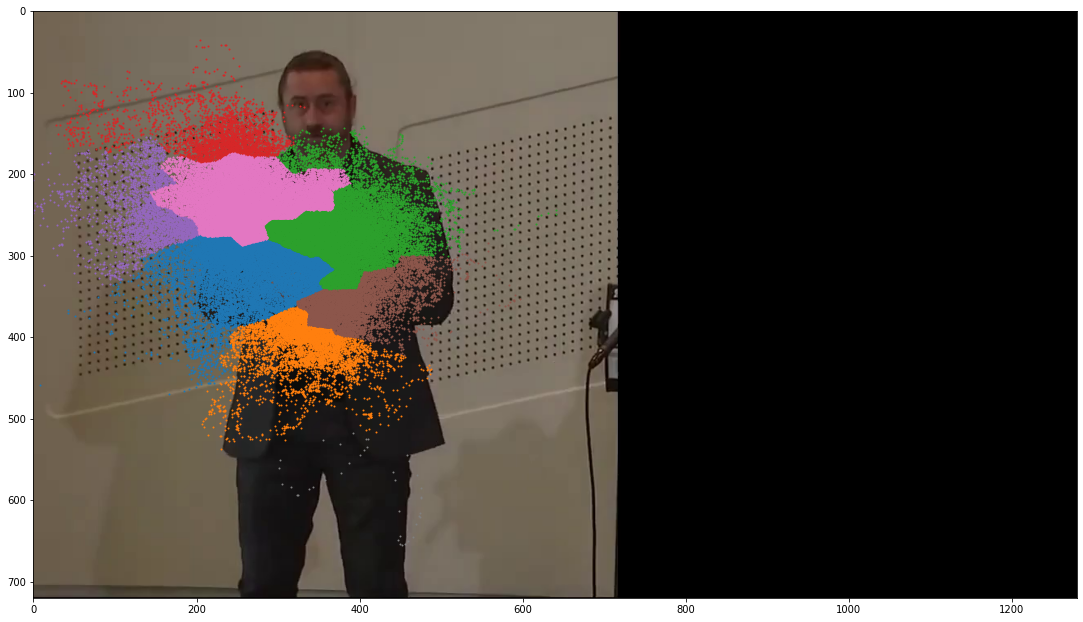

In [78]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = brc.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
print(np.unique(predicts).shape)
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
plt.imshow(background_image)
fig.savefig("./Clustered_BIRCH.png", dpi=100)
plt.show()



caRsLq4962c_Filtered.csv (7,)


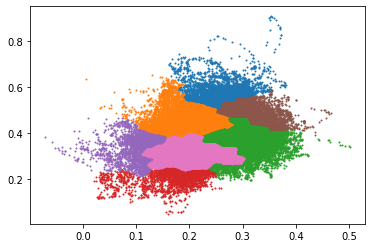

skF4Bo_Mdbk_Filtered.csv (7,)


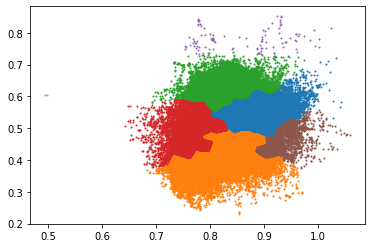

KLTCVuGNuqg_Filtered.csv (7,)


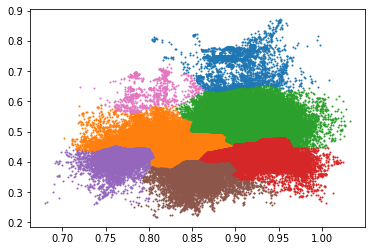

0sblzcxLTcI_Filtered.csv (7,)


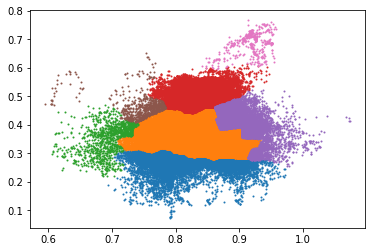

PEXbQEnjzo8_Filtered.csv (7,)


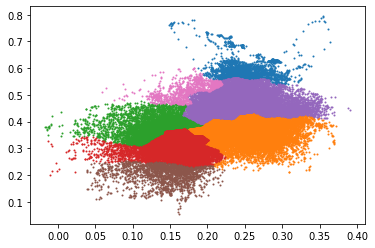

In [5]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

for DATA_LOC in os.listdir(os.getcwd()):
    both_hands = []
    left_hand = []
    right_hand = []
    if DATA_LOC.endswith("Filtered.csv"):
        data = pd.read_csv(DATA_LOC)
        left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
        both_hands += left_hand + right_hand


        both_hands = np.array(both_hands)

        brc = Birch(n_clusters=7, threshold=0.02)
        brc.fit(both_hands)

        #background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
        height, width, _ = 1, 1, 1
        predicts = brc.predict(both_hands)
        print(DATA_LOC, np.unique(predicts).shape)
        for center in np.unique(predicts):
            indices = np.where(predicts == center)
            plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
        #plt.imshow(background_image)
        #fig.savefig("./Clustered_BIRCH_more_points.png", dpi=100)
        plt.show()

# Symbolizing

### KMeans clustering

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


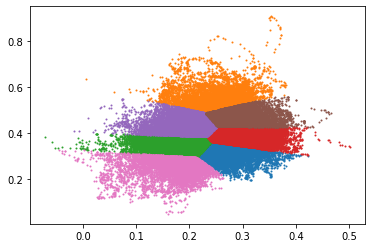

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


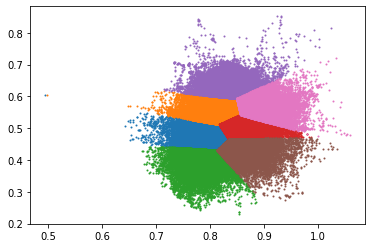

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


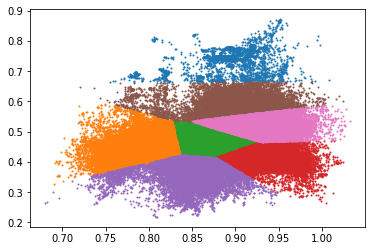

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


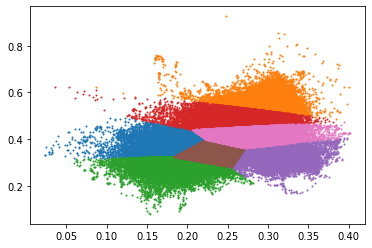

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


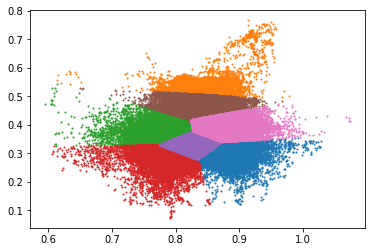

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


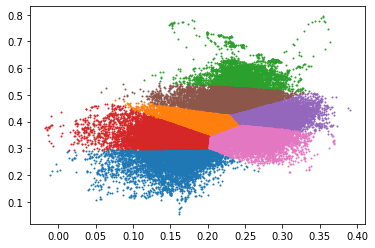

In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
alphas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
DATA_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos"
SAVE_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Symbolized/KMeans_Clustering"
for file in os.listdir(DATA_LOC):
    both_hands = []
    left_hand = []
    right_hand = []
    
    if file.endswith("Filtered.csv"):
        data = pd.read_csv(os.path.join(DATA_LOC, file))
        left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
        both_hands += left_hand + right_hand
        len_left = len(left_hand)
        len_right = len(right_hand)
        symbolized = {"Left":["" for _ in range(0, len_left)], "Right":["" for _ in range(0, len_right)]}
        both_hands = np.array(both_hands)

        kmeans = KMeans(n_clusters=7, random_state=0).fit(both_hands)

        height, width, _ = 1, 1, 1
        predicts = kmeans.predict(both_hands)
        
        symbols = {cluster:alphas[i] for i, cluster in enumerate(np.unique(predicts))}
        print(DATA_LOC, np.unique(predicts).shape)
        for center in np.unique(predicts):
            indices = np.where(predicts == center)
            for index in indices[0]:
                if index < len_left:
                    symbolized["Left"][index] = symbols[center]
                else:
                    symbolized["Right"][index - len_left] = symbols[center]
            plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
        plt.show()
        data_frame = pd.DataFrame(symbolized)
        data_frame.to_csv(os.path.join(SAVE_LOC, file.replace(".csv", "_Symbolized_KMeans.csv")))

caRsLq4962c_Filtered.csv 46940
skF4Bo_Mdbk_Filtered.csv 112552
KLTCVuGNuqg_Filtered.csv 74036
b1wRBGuXqds_Filtered.csv 74929
0sblzcxLTcI_Filtered.csv 67560
PEXbQEnjzo8_Filtered.csv 38845
/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/Normalized_hand_pos (7,)


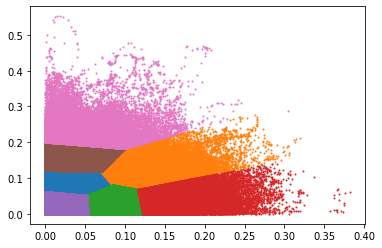

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
alphas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
DATA_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/Normalized_hand_pos"
SAVE_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Symbolized/KMeans_Clustering"
both_hands = []
left_hand = []
right_hand = []
for file in os.listdir(DATA_LOC):
    if file.endswith("Filtered.csv"):
        print(file, end=" ")
        data = pd.read_csv(os.path.join(DATA_LOC, file))
        print(len(data))
        left_hand += convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand += convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])

both_hands += left_hand + right_hand
len_left = len(left_hand)
len_right = len(right_hand)
symbolized = {"Left":["" for _ in range(0, len_left)], "Right":["" for _ in range(0, len_right)]}
both_hands = np.array(both_hands)

kmeans = KMeans(n_clusters=7, random_state=0).fit(both_hands)

height, width, _ = 1, 1, 1
predicts = kmeans.predict(both_hands)

symbols = {cluster:alphas[i] for i, cluster in enumerate(np.unique(predicts))}
print(DATA_LOC, np.unique(predicts).shape)
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    for index in indices[0]:
        if index < len_left:
            symbolized["Left"][index] = symbols[center]
        else:
            symbolized["Right"][index - len_left] = symbols[center]
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
plt.show()
data_frame = pd.DataFrame(symbolized)
data_frame.to_csv(os.path.join(SAVE_LOC, "Normalized_All_Symbolized_KMeans.csv"))

### BIRCH Clustering

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


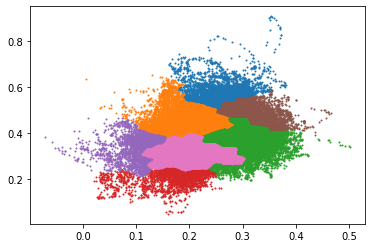

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


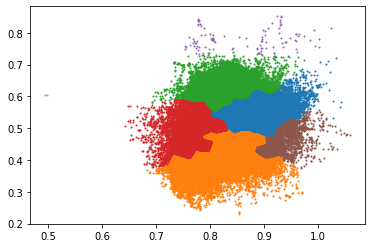

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


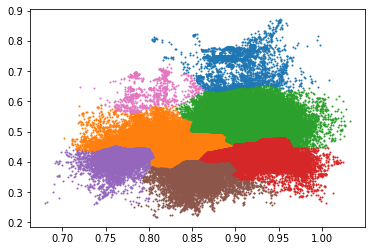

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


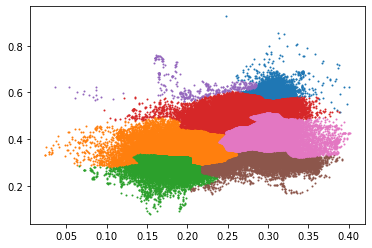

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


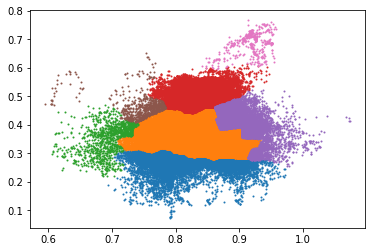

/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos (7,)


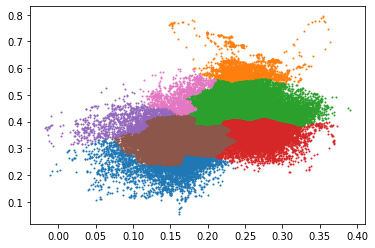

In [32]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
alphas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
DATA_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/regular_hand_pos"
SAVE_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Symbolized/BIRCH_Clustering"
for file in os.listdir(DATA_LOC):
    both_hands = []
    left_hand = []
    right_hand = []
    
    if file.endswith("Filtered.csv"):
        data = pd.read_csv(os.path.join(DATA_LOC, file))
        left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
        both_hands += left_hand + right_hand
        len_left = len(left_hand)
        len_right = len(right_hand)
        symbolized = {"Left":["" for _ in range(0, len_left)], "Right":["" for _ in range(0, len_right)]}
        both_hands = np.array(both_hands)

        brc = Birch(n_clusters=7, threshold=0.02)
        brc.fit(both_hands)

        height, width, _ = 1, 1, 1
        predicts = brc.predict(both_hands)
        
        symbols = {cluster:alphas[i] for i, cluster in enumerate(np.unique(predicts))}
        print(DATA_LOC, np.unique(predicts).shape)
        for center in np.unique(predicts):
            indices = np.where(predicts == center)
            for index in indices[0]:
                if index < len_left:
                    symbolized["Left"][index] = symbols[center]
                else:
                    symbolized["Right"][index - len_left] = symbols[center]
            plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
        plt.show()
        data_frame = pd.DataFrame(symbolized)
        data_frame.to_csv(os.path.join(SAVE_LOC, file.replace(".csv", "_Symbolized_BIRCH.csv")))

caRsLq4962c_Filtered.csv
skF4Bo_Mdbk_Filtered.csv
KLTCVuGNuqg_Filtered.csv
b1wRBGuXqds_Filtered.csv
0sblzcxLTcI_Filtered.csv
PEXbQEnjzo8_Filtered.csv
/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/Normalized_hand_pos (7,)


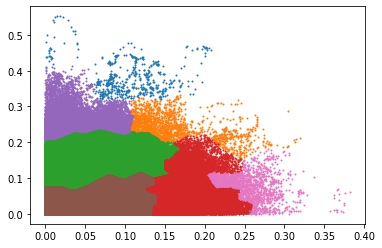

In [29]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
alphas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
DATA_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Hand_Pos_files/Normalized_hand_pos"
SAVE_LOC = "/home/tannishpage/Nextcloud/University 2022/UQ AI Collaboratory Project/All_Code/Data/Symbolized/BIRCH_Clustering"
both_hands = []
left_hand = []
right_hand = []
for file in os.listdir(DATA_LOC):
    if file.endswith("Filtered.csv"):
        print(file)
        data = pd.read_csv(os.path.join(DATA_LOC, file))
        left_hand += convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
        right_hand += convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])

both_hands += left_hand + right_hand
len_left = len(left_hand)
len_right = len(right_hand)
symbolized = {"Left":["" for _ in range(0, len_left)], "Right":["" for _ in range(0, len_right)]}
both_hands = np.array(both_hands)

brc = Birch(n_clusters=7, threshold=0.02)
brc.fit(both_hands)

height, width, _ = 1, 1, 1
predicts = brc.predict(both_hands)

symbols = {cluster:alphas[i] for i, cluster in enumerate(np.unique(predicts))}
print(DATA_LOC, np.unique(predicts).shape)
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    for index in indices[0]:
        if index < len_left:
            symbolized["Left"][index] = symbols[center]
        else:
            symbolized["Right"][index - len_left] = symbols[center]
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
plt.show()
data_frame = pd.DataFrame(symbolized)
data_frame.to_csv(os.path.join(SAVE_LOC, "Normalized_All_Symbolized_BIRCH.csv"))

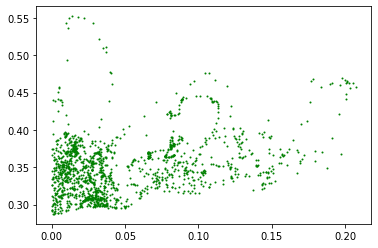